In [2]:
import requests
from bs4 import BeautifulSoup as BS

import pandas as pd
pd.set_option('display.max_columns', 109)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
import seaborn as sns
from scipy.stats import spearmanr

!pip install pandas_profiling
import pandas_profiling

In [3]:
readmission_tn = readmission[(readmission['State'] == 'TN') & (readmission['Excess Readmission Ratio'] != 'Not Available')]
readmission_tn.head()

NameError: name 'readmission' is not defined

In [4]:
readmission_tn.rename(columns={'Hospital Name': 'hosp_name', 'Measure Name': 'meas_name'}, inplace=True)
readmission_tn


NameError: name 'readmission_tn' is not defined

In [ ]:
readmission_tn['Excess Readmission Ratio'] = pd.to_numeric(readmission_tn['Excess Readmission Ratio'], errors='coerce').fillna(0)
readmission_tn

In [ ]:
readmiss_gb_hi = readmission_tn.groupby(['hosp_name']).agg({'Excess Readmission Ratio': 'mean'}).sort_values(by='Excess Readmission Ratio', ascending=False)
readmiss_gb_hi


In [ ]:
stf = readmission_tn.query('hosp_name == "ST FRANCIS HOSPITAL"')
stf = stf.set_index('meas_name')
stf

In [ ]:
stthomas = readmission_tn.query('hosp_name == "SAINT THOMAS WEST HOSPITAL"')
stthomas.set_index('meas_name')

In [5]:
PR = pd.read_csv('data/SDH.csv').profile_report()
PR

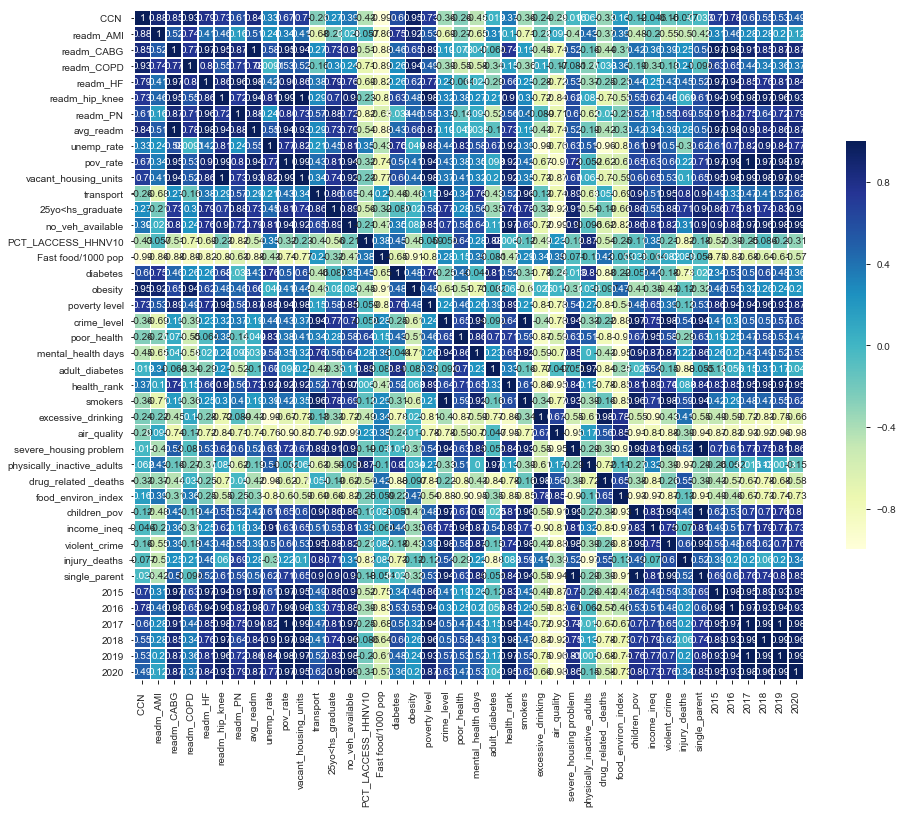

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = SDH_corr

sns.heatmap(corr, cmap='YlGnBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [10]:
SDH

CCN  state         city                          hospital_region  \
0  440082    TN    Nashville                     St. Thomas West_Nash   
1  440091    TN  Chattanooga        Memorial Healthcare System_Chatta   
2  440183    TN      Memphis      St. Francis Hospital Region_Memphis   
3  440193    TN      Lebanon  Vanderbilt Wilson County Region_Lebanon   

   readm_AMI  readm_CABG  readm_COPD  readm_HF  readm_hip_knee  readm_PN  \
0     0.9366      0.8766      0.9787    0.9465          0.9051    0.9982   
1     0.9792      0.8224      0.9520    0.8691          0.9350    0.8356   
2     0.9989      1.1440      1.0183    1.0728          1.2239    1.0951   
3     1.0337      0.9944      1.0415    0.9929          1.0034    0.9920   

   avg_readm  unemp_rate  pov_rate  vacant_housing_units  transport  \
0       0.94         2.7    10.633                7.6300       4.60   
1       0.90         3.6     9.330                8.4000       2.10   
2       1.10         4.3    31.430               18.5667       4.37   
3       1.01         2.9    14.230               10.4000       1.40   

   25yo<hs_graduate  no_veh_available  PCT_LACCESS_HHNV10  Fast food/1000 pop  \
0           24.8600             4.733                1.54                0.93   
1            9.1000             3.900                3.53                0.90   
2           35.2667            10.967                1.89                0.70   
3           13.2000             3.270                1.65                0.71   

   diabetes  obesity  poverty level  crime_level  poor_health  \
0       9.3     30.3           7.03        126.5         16.9   
1      11.8     30.6           9.30         96.7         20.0   
2      12.1     34.6          15.16        134.6         20.0   
3      11.5     38.0          10.13         52.6         14.9   

   mental_health days  adult_diabetes  health_rank  smokers  \
0                 4.4            10.9            6     20.9   
1                 4.4            13.7           13     20.0   
2                 4.5            12.6           49     21.0   
3                 4.0            11.9            2     19.0   

   excessive_drinking  air_quality  severe_housing problem  \
0                17.6         10.6                    17.6   
1                14.4         10.9                    15.2   
2                13.1          9.5                    20.7   
3                17.0         11.1                    12.9   

   physically_inactive_adults  drug_related _deaths  food_environ_index  \
0                          23                  23.4                 7.2   
1                          25                  19.4                 6.9   
2                          24                  18.4                 5.9   
3                          24                  21.8                 8.6   

   children_pov  income_ineq  violent_crime  injury_deaths  single_parent  \
0            23          4.4           1105             88             41   
1            18          4.9            663             72             33   
2            29          5.4           1346             82             51   
3            11          3.9            303             78             25   

   2015  2016  2017  2018  2019  2020  
0  0.12  0.03  0.02  0.03  0.02  0.26  
1  0.00  0.00  0.00  0.27  0.00  0.00  
2  0.45  0.43  1.04  1.61  2.26  1.54  
3  0.17  0.16  0.12  0.21  0.04  0.11

In [7]:
SDH = pd.read_csv('data/SDH.csv')
SDH_corr = SDH.corr(method='pearson')
SDH_corr

CCN   readm_AMI  readm_CABG  readm_COPD  \
CCN                         1.000000   0.879788    0.846770    0.927794   
readm_AMI                   0.879788   1.000000    0.523854    0.742100   
readm_CABG                  0.846770   0.523854    1.000000    0.770735   
readm_COPD                  0.927794   0.742100    0.770735    1.000000   
readm_HF                    0.793116   0.411349    0.974830    0.799693   
readm_hip_knee              0.734582   0.463090    0.945403    0.552390   
readm_PN                    0.612359   0.163948    0.870286    0.710843   
avg_readm                   0.844156   0.512818    0.999475    0.780185   
unemp_rate                  0.332629   0.238553    0.576188    0.009086   
pov_rate                    0.671224   0.340541    0.947816    0.527759   
vacant_housing_units        0.699066   0.413456    0.937783    0.519612   
transport                  -0.258242  -0.676110    0.273191   -0.161321   
25yo<hs_graduate            0.265542  -0.205812    0.725512    0.297798   
no_veh_available            0.386272   0.027730    0.799688    0.241245   
PCT_LACCESS_HHNV10         -0.425671  -0.057206   -0.513257   -0.706131   
Fast food/1000 pop         -0.993988  -0.858997   -0.883822   -0.891880   
diabetes                    0.600783   0.748097    0.462296    0.264209   
obesity                     0.948827   0.917010    0.654781    0.942860   
poverty level               0.726113   0.533639    0.885784    0.487575   
crime_level                -0.361917  -0.690290    0.188275   -0.385555   
poor_health                -0.255688  -0.266529    0.072646   -0.549881   
mental_health days         -0.452715  -0.647908    0.046889   -0.582337   
adult_diabetes              0.019340   0.310940   -0.068476   -0.344799   
health_rank                 0.374413   0.101749    0.744725    0.152991   
smokers                    -0.362810  -0.708268    0.188481   -0.359910   
excessive_drinking         -0.242670  -0.215345   -0.454034    0.104235   
air_quality                -0.288303   0.091673   -0.743033   -0.169388   
severe_housing problem     -0.015601  -0.402779    0.515730   -0.081461   
physically_inactive_adults  0.062426   0.429299   -0.155267   -0.272725   
drug_related _deaths       -0.331572  -0.369445   -0.444489    0.032779   
food_environ_index          0.164814   0.385712   -0.314422    0.360776   
children_pov               -0.121138  -0.483956    0.420491   -0.190494   
income_ineq                -0.046062  -0.196942    0.357468   -0.311058   
violent_crime              -0.161734  -0.550711    0.387989   -0.180544   
injury_deaths              -0.077384  -0.501537    0.254572    0.207108   
single_parent              -0.032848  -0.417604    0.500867   -0.097683   
2015                        0.696604   0.309736    0.971344    0.634350   
2016                        0.778103   0.462311    0.984614    0.652696   
2017                        0.602869   0.277671    0.911320    0.440663   
2018                        0.554665   0.284416    0.852987    0.339641   
2019                        0.528457   0.202172    0.870893    0.358152   
2020                        0.491954   0.116800    0.870888    0.369615   

                            readm_HF  readm_hip_knee  readm_PN  avg_readm  \
CCN                         0.793116        0.734582  0.612359   0.844156   
readm_AMI                   0.411349        0.463090  0.163948   0.512818   
readm_CABG                  0.974830        0.945403  0.870286   0.999475   
readm_COPD                  0.799693        0.552390  0.710843   0.780185   
readm_HF                    1.000000        0.864495  0.955565   0.981463   
readm_hip_knee              0.864495        1.000000  0.721207   0.935720   
readm_PN                    0.955565        0.721207  1.000000   0.884718   
avg_readm                   0.981463        0.935720  0.884718   1.000000   
unemp_rate                  0.415675        0.811012  0.238999   0.552526   
pov_rate                    0.895713

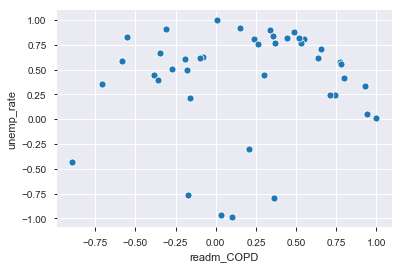

In [11]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.unemp_rate, data=SDH_corr)

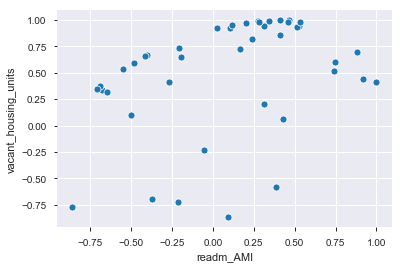

In [13]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.vacant_housing_units, data=SDH_corr)

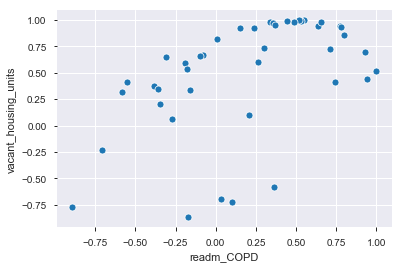

In [14]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.vacant_housing_units, data=SDH_corr)

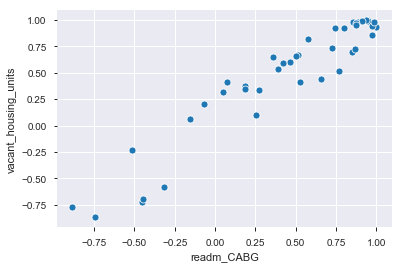

In [15]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.vacant_housing_units, data=SDH_corr)

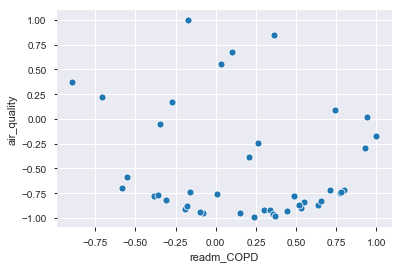

In [16]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.air_quality, data=SDH_corr)

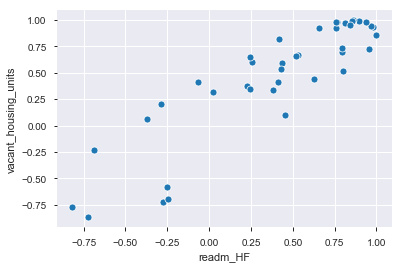

In [17]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr.vacant_housing_units, data=SDH_corr)

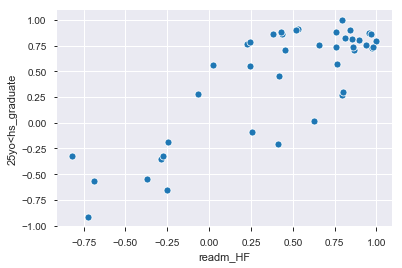

In [18]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr['25yo<hs_graduate'], data=SDH_corr)

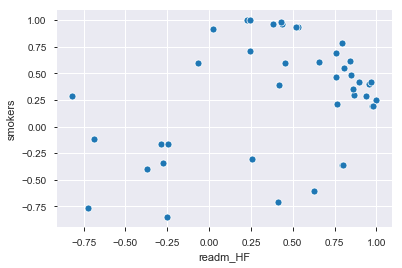

In [19]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr.smokers, data=SDH_corr)

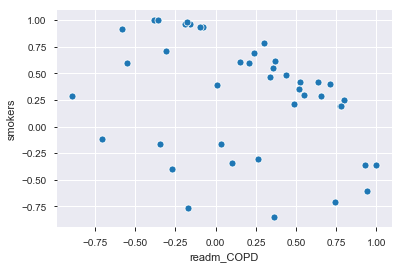

In [20]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.smokers, data=SDH_corr)

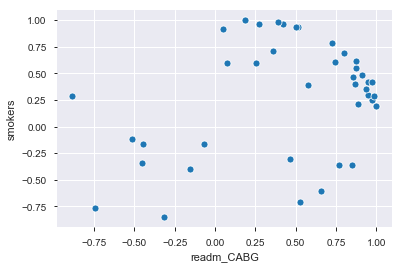

In [63]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.smokers, data=SDH_corr)

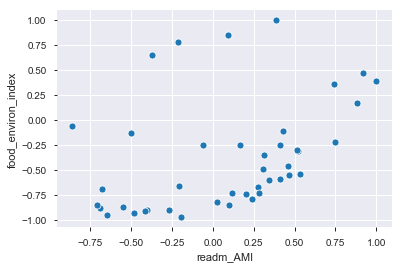

In [24]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.food_environ_index, data=SDH_corr)

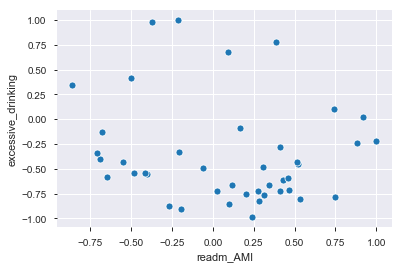

In [25]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.excessive_drinking, data=SDH_corr)

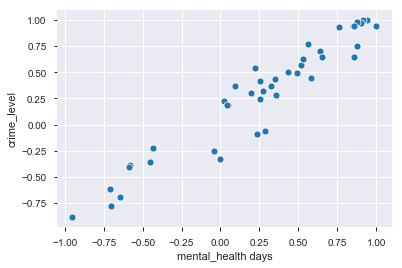

In [26]:
sns.scatterplot(SDH_corr['mental_health days'], SDH_corr.crime_level, data=SDH_corr)

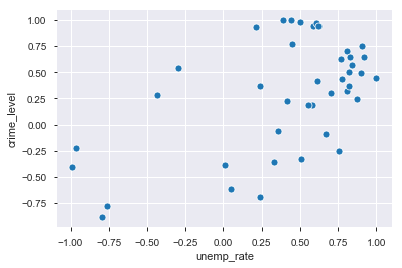

In [27]:
sns.scatterplot(SDH_corr.unemp_rate, SDH_corr.crime_level, data=SDH_corr)

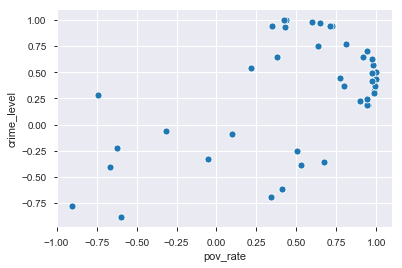

In [28]:
sns.scatterplot(SDH_corr.pov_rate, SDH_corr.crime_level, data=SDH_corr)

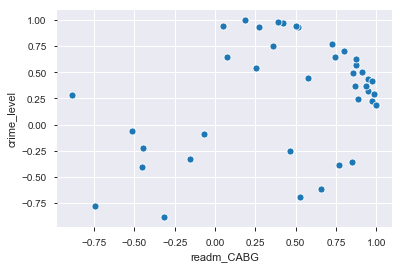

In [29]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.crime_level, data=SDH_corr)

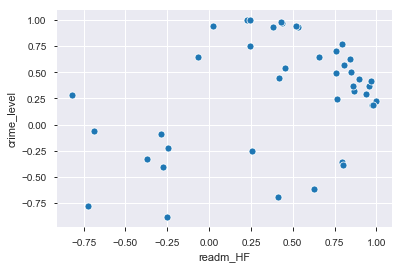

In [30]:
sns.scatterplot(SDH_corr.readm_HF, SDH_corr.crime_level, data=SDH_corr)

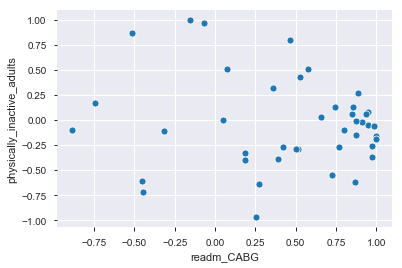

In [31]:
sns.scatterplot(SDH_corr.readm_CABG, SDH_corr.physically_inactive_adults, data=SDH_corr)

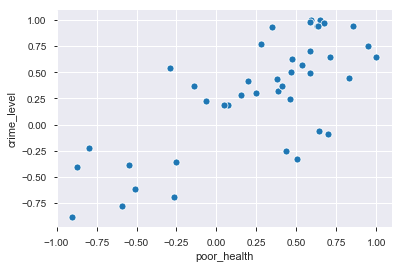

In [32]:
sns.scatterplot(SDH_corr.poor_health, SDH_corr.crime_level, data=SDH_corr)

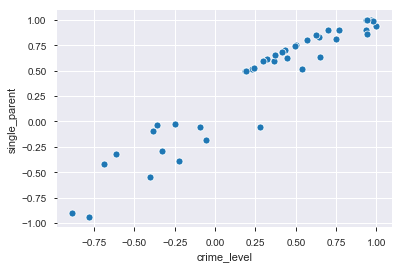

In [33]:
sns.scatterplot(SDH_corr.crime_level, SDH_corr.single_parent, data=SDH_corr)

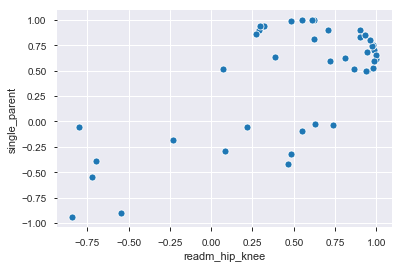

In [34]:
sns.scatterplot(SDH_corr.readm_hip_knee, SDH_corr.single_parent, data=SDH_corr)

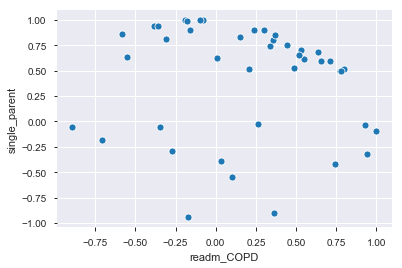

In [35]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.single_parent, data=SDH_corr)

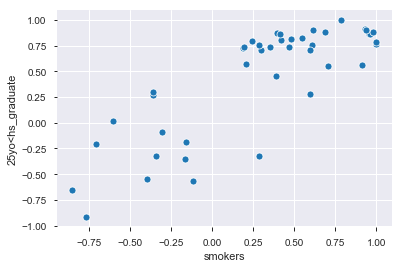

In [36]:
sns.scatterplot(SDH_corr.smokers, SDH_corr['25yo<hs_graduate'], data=SDH_corr)

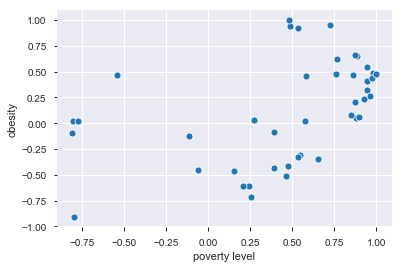

In [37]:
sns.scatterplot(SDH_corr['poverty level'], SDH_corr.obesity, data=SDH_corr)

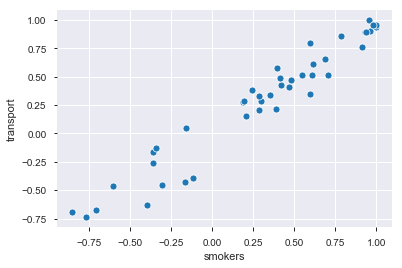

In [38]:
sns.scatterplot(SDH_corr.smokers, SDH_corr.transport, data=SDH_corr)

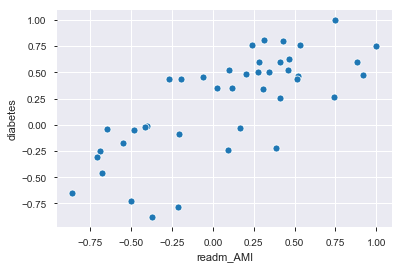

In [40]:
sns.scatterplot(SDH_corr.readm_AMI, SDH_corr.diabetes, data=SDH_corr)

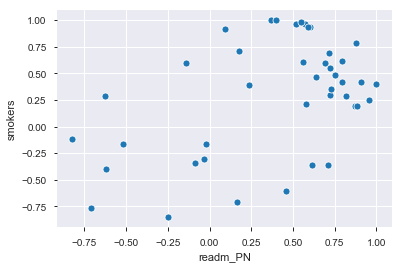

In [41]:
sns.scatterplot(SDH_corr.readm_PN, SDH_corr.smokers, data=SDH_corr)

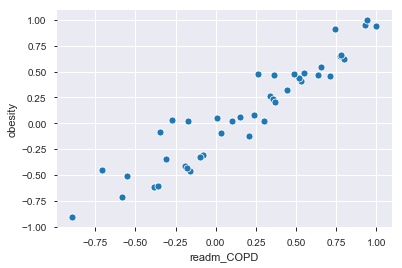

In [44]:
sns.scatterplot(SDH_corr.readm_COPD, SDH_corr.obesity, data=SDH_corr)

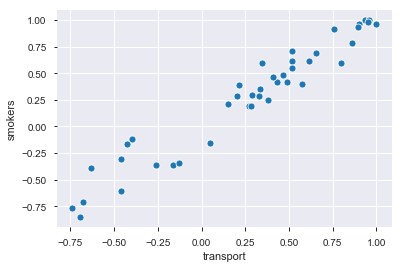

In [45]:
sns.scatterplot(SDH_corr.transport, SDH_corr.smokers, data=SDH_corr)

In [ ]:
sns.scatterplot(SDH_corr.readm_PN, SDH_corr.smokers, data=SDH_corr)

In [20]:
CH = pd.read_csv('data/County_Health.csv')
CH = CH.corr(method='pearson')
CH

FIPS  readm_AMI  readm_CABG  \
FIPS                               1.000000   0.938916    0.762572   
readm_AMI                          0.938916   1.000000    0.523854   
readm_CABG                         0.762572   0.523854    1.000000   
readm_COPD                         0.905063   0.742100    0.770735   
readm_HF                           0.694627   0.411349    0.974830   
readm_hip_knee                     0.654289   0.463090    0.945403   
readm_PN                           0.493300   0.163948    0.870286   
Years of Potential Life Lost Rate -0.090536  -0.275520    0.510551   
% Fair/Poor                       -0.042348  -0.230695    0.548973   
Physically Unhealthy Days         -0.597831  -0.767422    0.052595   
Mentally Unhealthy Days           -0.545000  -0.647908    0.046889   
% LBW                              0.285919   0.160001    0.689693   
% Smokers                         -0.513516  -0.733073    0.163317   
% Obese                            0.986882   0.943488    0.674909   
Food Environment Index             0.261259   0.385712   -0.314422   
% Physically Inactive              0.157572   0.429299   -0.155267   
% With Access                     -0.748380  -0.819151   -0.195327   
% Excessive Drinking              -0.220048  -0.255783   -0.403352   
# Alcohol-Impaired Driving Deaths -0.208275  -0.510405    0.464972   
# Driving Deaths                  -0.047883  -0.317352    0.604484   
% Alcohol-Impaired                 0.335979   0.400395   -0.178612   
Chlamydia Rate                    -0.360897  -0.540571    0.289074   
Z-Score                           -0.361009  -0.540284    0.288636   
Teen Birth Rate                   -0.059048  -0.287879    0.572257   
# Uninsured                       -0.239943  -0.517045    0.444897   
% Uninsured                       -0.598878  -0.820460    0.053746   
# Primary Care Physicians         -0.400773  -0.618657    0.279061   
PCP Rate                          -0.820744  -0.767791   -0.443781   
Dentist Rate                      -0.778745  -0.832311   -0.248663   
# Mental Health Providers         -0.672800  -0.884334   -0.073152   
MHP Rate                          -0.947715  -0.999596   -0.547838   
Preventable Hosp. Rate             0.119314  -0.103834    0.189668   
% Screened                        -0.364433  -0.060229   -0.879972   
% Vaccinated                       0.155988   0.286458   -0.402295   
Graduation Rate                    0.607227   0.770106   -0.038429   
% Some College                    -0.503579  -0.396247   -0.781031   
# Unemployed                      -0.056025  -0.306842    0.589201   
Labor Force                       -0.321835  -0.591224    0.366304   
% Unemployed                       0.284876   0.238553    0.576188   
% Children in Poverty             -0.252256  -0.483956    0.420491   
80th Percentile Income             0.653615   0.700074    0.124974   
20th Percentile Income             0.404967   0.468318   -0.120922   
Income Ratio                      -0.121013  -0.196942    0.357468   
# Single-Parent Households         0.043338  -0.226611    0.672021   
# Households                      -0.066178  -0.333995    0.589764   
% Single-Parent Households        -0.167755  -0.417604    0.500867   
# Associations                    -0.560122  -0.777579    0.108329   
Association Rate                  -0.911867  -0.722461   -0.955571   
Annual Average Violent Crimes     -0.057426  -0.338979    0.600774   
Violent Crime Rate                -0.298592  -0.550711    0.387989   
# Injury Deaths                   -0.218706  -0.495989    0.464455   
Injury Death Rate                 -0.196544  -0.501537    0.254572   
% Severe Housing Problems         -0.143098  -0.408823    0.527650   
Severe Housing Cost Burden        -0.045738  -0.297266    0.597347   
Overcrowding                      -0.238758  -0.551538    0.412828   
Inadequate Facilities                   NaN        NaN         NaN   
% Drive Alone                      0.781235   0.9

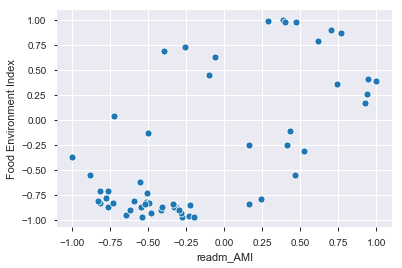

In [23]:
sns.scatterplot(CH['readm_AMI'], CH['Food Environment Index'], data=CH)

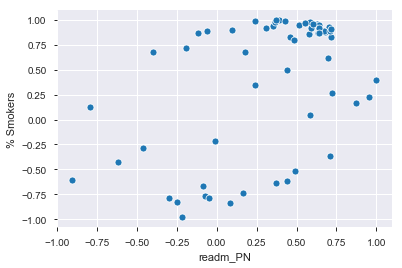

In [22]:
sns.scatterplot(CH['readm_PN'], CH['% Smokers'], data=CH)

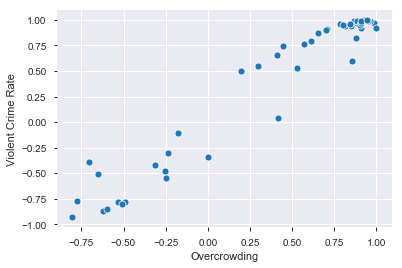

In [58]:
sns.scatterplot(CH['Overcrowding'], CH['Violent Crime Rate'], data=CH)

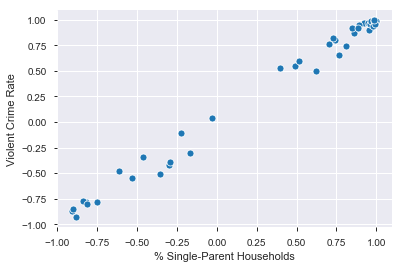

In [59]:
sns.scatterplot(CH['% Single-Parent Households'], CH['Violent Crime Rate'], data=CH)

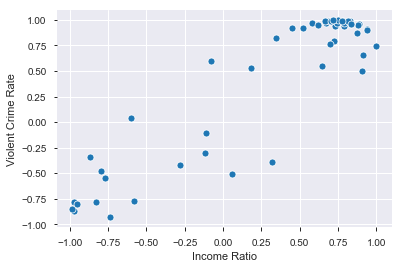

In [60]:
sns.scatterplot(CH['Income Ratio'], CH['Violent Crime Rate'], data=CH)

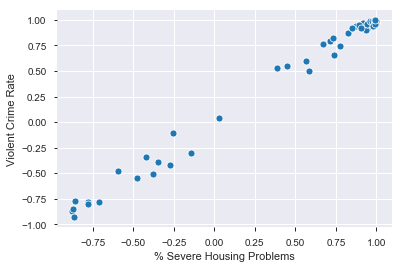

In [62]:
sns.scatterplot(CH['% Severe Housing Problems'], CH['Violent Crime Rate'], data=CH)

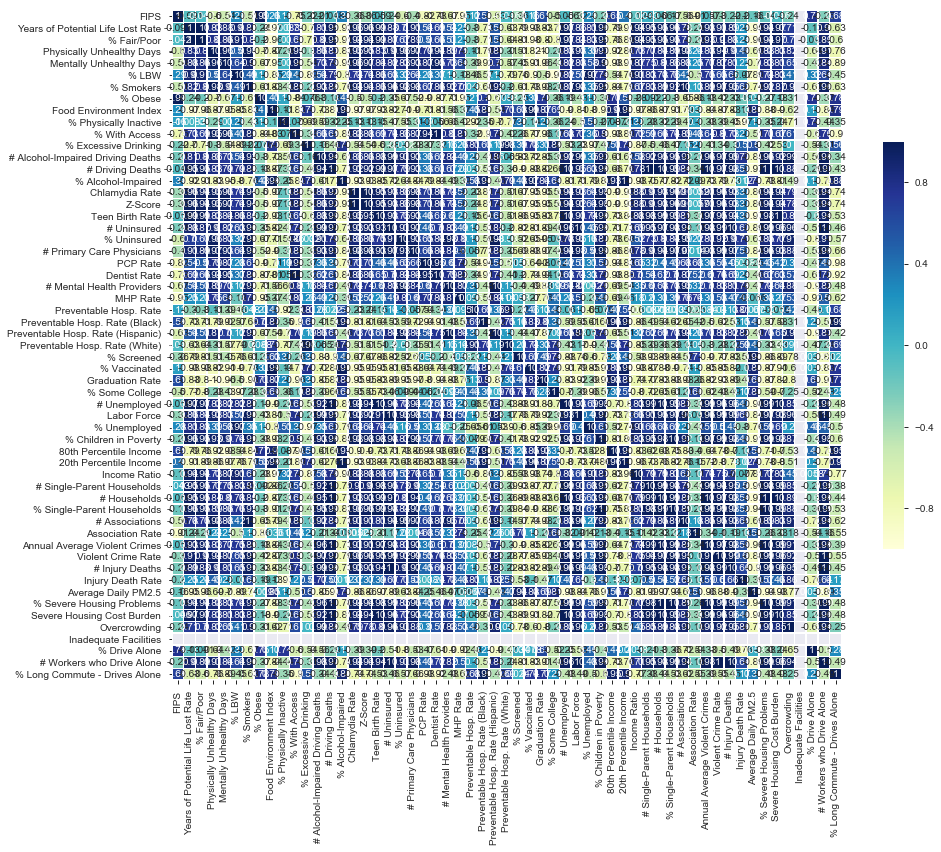

In [52]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = CH

sns.heatmap(corr, cmap='YlGnBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [ ]:
sd_gb = SDH.groupby(['hospital_region']).agg({'unemp_rate': 'mean', 'pov_rate': 'mean', 'vacant_housing_units': 'mean', 'transport': 'mean', '25yo<hs_graduate': 'mean', 'no_veh_available':'mean', 'read_AMI': 'mean', 'readm_CABG': 'mean', 'readm_COPD': 'mean', 'readm_HF': 'mean', 'readm_hip_knee': 'mean', 'readm_PN': 'mean'}).apply(lambda x: x)
sd_gb

In [ ]:
corr2 = sd_gb.corr(method='pearson')
corr2.drop_duplicates()

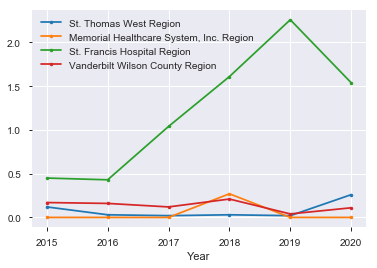

In [19]:
dates = pd.read_csv('data/dates.csv')
dates_ind = dates.set_index('Year')
dates_ind.plot.line(style='.-')